### Problem statement(company data)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
# import some data to play with
df1 = pd.read_csv('D:\\Assignment\\Decision_tree_assign\\Fraud_check.csv')

In [3]:
df1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
df1["income"]="<=30000"
df1.loc[df1["Taxable.Income"]>=30000,"income"]="Good"
df1.loc[df1["Taxable.Income"]<=30000,"income"]="Risky"

In [6]:
df1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [7]:
##Checking for maximum and minimum values to decide what will be the cut off point
df1["income"].min()
df1["income"].max()
df1["income"].value_counts()

Good     476
Risky    124
Name: income, dtype: int64

In [8]:
df1 = df1.drop(['Taxable.Income'],axis=1)

In [9]:
df1.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,income
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


In [11]:
## Fraud data has no null values
df1.isnull().sum()

Undergrad          0
Marital.Status     0
City.Population    0
Work.Experience    0
Urban              0
income             0
dtype: int64

In [14]:
df1.rename(columns={"Marital.Status":"marital","City.Population":"population","Work.Experience":"workexp"},inplace=True)
df1.isnull().sum()

Undergrad     0
marital       0
population    0
workexp       0
Urban         0
income        0
dtype: int64

In [15]:
#Complete Iris dataset
label_encoder = preprocessing.LabelEncoder()
df1['Undergrad']= label_encoder.fit_transform(df1['Undergrad']) 
df1['marital']= label_encoder.fit_transform(df1['marital']) 
df1['Urban']= label_encoder.fit_transform(df1['Urban']) 
df1['income']= label_encoder.fit_transform(df1['income']) 

In [16]:
df1

,Undergrad,marital,population,workexp,Urban,income
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


In [17]:
x = df1.iloc[:,0:5] 
y = df1.iloc[:,5]

In [18]:
x

,Undergrad,marital,population,workexp,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [19]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: income, Length: 600, dtype: int32

In [20]:
##Splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)


In [21]:
y_train.value_counts()
y_test.value_counts()

0    92
1    28
Name: income, dtype: int64

In [22]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

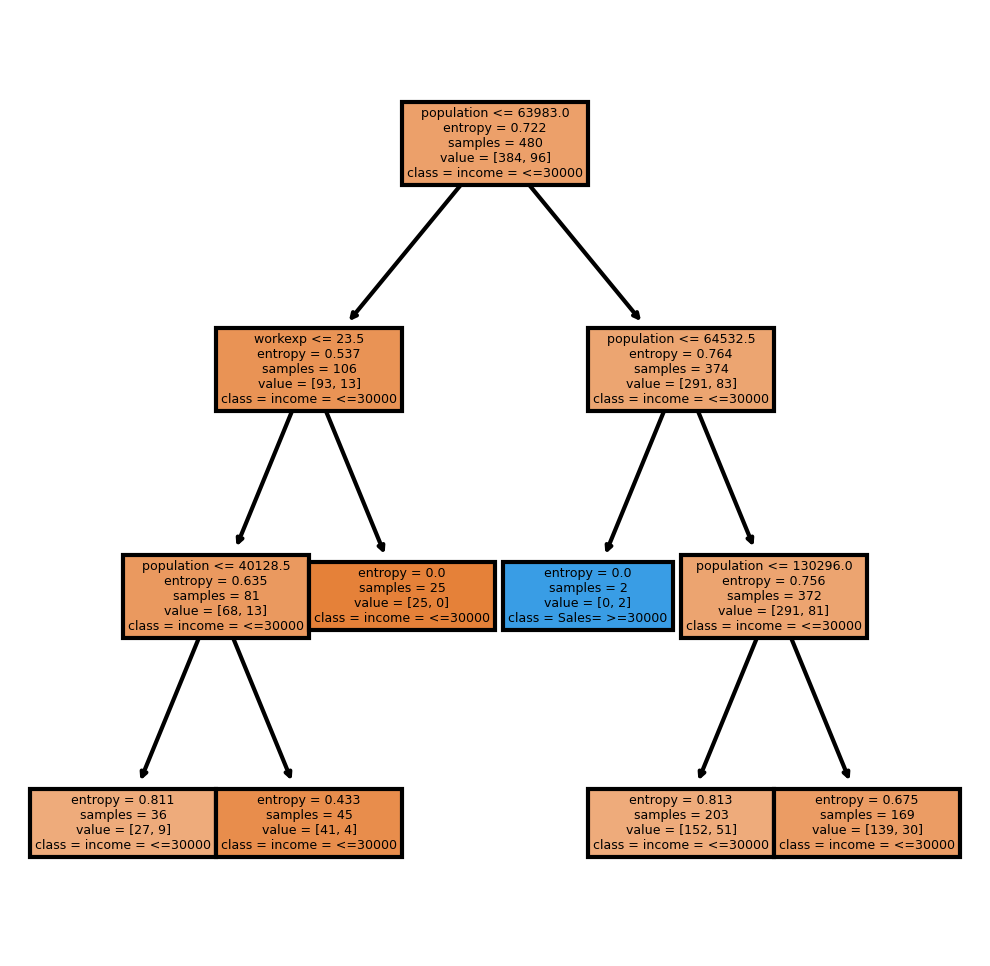

In [23]:
fn=['Undergrad','marital','population','workexp','Urban']
cn=['income = <=30000', 'Sales= >=30000']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);